In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

random_state = 1234

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e' -O creditcard.pkl

--2025-03-26 18:04:32--  https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e
Resolving docs.google.com (docs.google.com)... 173.194.206.138, 173.194.206.101, 173.194.206.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.206.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e&export=download [following]
--2025-03-26 18:04:32--  https://drive.usercontent.google.com/download?id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70633109 (67M) [application/octet-stream]
Saving to: ‘creditcard.pkl’

creditcard.pkl      100%[===================>]  67.36M   103MB/

In [11]:
#Cargamos los datos
df = pd.read_pickle('creditcard.pkl')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

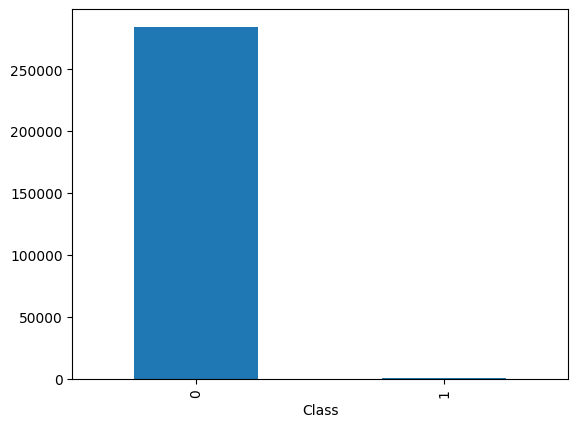

In [12]:
#Exploramos la variable objetivo
print(df.Class.value_counts())
df.Class.value_counts().plot(kind='bar')

In [13]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Class'),
    df['Class'],
    test_size=0.2,
    stratify=df['Class'],
    random_state=random_state
)

In [14]:
#Entrenaremos un classificador RandomForest para resolver este problema
rf_base = RandomForestClassifier(random_state=random_state)

pipeline_rf = Pipeline(steps = [
        ('classifier', rf_base),
                            ])

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, param_grid=param_grid)

In [15]:
# Entrenemos el random forest:
rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=1234))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 10, 50],
                         'classifier__n_estimators': [50, 100]})

In [16]:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50}

In [17]:
# Obtengamos la accuracy y el F1 score de entrenamiento
print("Training set")
print(f'Accuracy: {rf.score(X_train, y_train)}')
print(f"F1 score: {f1_score(y_train, rf.predict(X_train), average='macro')}")
print('\n')

Training set
Accuracy: 0.9996576620070662
F1 score: 0.9452924324533583




In [18]:
# Obtengamos la accuracy y el F1 score de prueba para cada modelo:
print("Test set")
print(f'Accuracy: {rf.score(X_test, y_test)}')
print(f"F1 score: {f1_score(y_test, rf.predict(X_test), average='macro')}")
print('\n')

Test set
Accuracy: 0.9995962220427653
F1 score: 0.9363629832748375




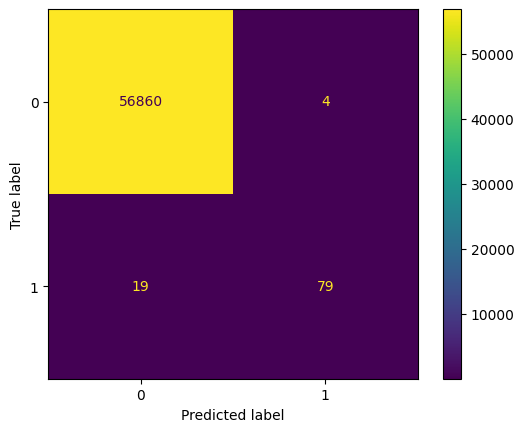

In [19]:
# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm = confusion_matrix(y_test,rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [21]:
#Ahora, entrenemos un modelo basado en Isolation Forest
#Tip: Isolation forest de sklearn devuelve -1 para outliers y 1 para inliers.
#Por esta razón, se deben mapear los -1 devueltos por el modelo para poder calcular
#las métricas de validación que se utilizan

X = df.drop(columns=["Class"])
# Instantiate the model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model (unsupervised)
iso_forest.fit(X)

# Predict: -1 = outlier, 1 = inlier
y_pred = iso_forest.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [23]:
# Map predictions: 1 → 0 (inlier), -1 → 1 (outlier)
y_pred_mapped = [1 if label == -1 else 0 for label in y_pred]

[[270491  13824]
 [    75    417]]


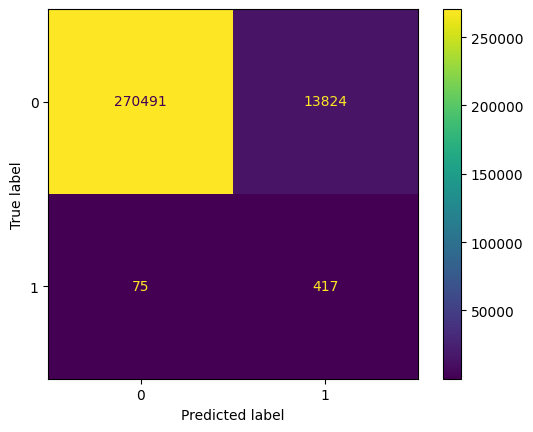

In [35]:
y_true = df["Class"]

print(confusion_matrix(y_true, y_pred_mapped))

# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm1 = confusion_matrix(y_true, y_pred_mapped)
disp1= ConfusionMatrixDisplay(confusion_matrix=cm)
disp1.plot()
plt.show()

In [36]:
#Calcular el accuracy y F1 score de Isolation forest en los conjuntos de entrenamiento y test
print(classification_report(y_true, y_pred_mapped))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.85      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.90      0.52    284807
weighted avg       1.00      0.95      0.97    284807

